In [ ]:
import numpy as np              #importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IIT Stuffs /SDGP/Data Science/Dataset/MyCopyOf_pone.0210602.s001.csv') #reading data

In [ ]:
data.info() #checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TIME               299 non-null    int64  
 1   Event              299 non-null    int64  
 2   Gender             299 non-null    int64  
 3   Smoking            299 non-null    int64  
 4   Diabetes           299 non-null    int64  
 5   BP                 299 non-null    int64  
 6   Anaemia            299 non-null    int64  
 7   Age                299 non-null    float64
 8   Ejection.Fraction  299 non-null    int64  
 9   Sodium             299 non-null    int64  
 10  Creatinine         299 non-null    float64
 11  Pletelets          299 non-null    float64
 12  CPK                299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.duplicated().sum() #checking for duplicate values

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


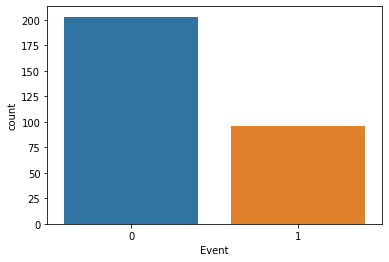

In [ ]:
g = sns.countplot(data['Event']) #checking for imbalance
plt.show()

In [ ]:
x = data[[c for c in data.columns if c != 'Event']] #separating features
y = data['Event'] #separating target

In [ ]:
from imblearn.over_sampling import SMOTE #importing libraries for oversampling data
from collections import Counter
sm = SMOTE()
x_smote, y_smote = sm.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Original dataset shape Counter({0: 203, 1: 96})
Resample dataset shape Counter({0: 203, 1: 203})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

inp_data = data.drop(data[['Event']], axis=1)
out_data = data[['Event']]

scaler = StandardScaler()
inp_data = scaler.fit_transform(inp_data)

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=42)

In [ ]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (239, 12)
X_test Shape  :  (60, 12)
y_train Shape :  (239, 1)
y_test Shape  :  (60, 1)


In [ ]:
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = XGBClassifier() 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.87

               precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.71      0.88      0.79        17

    accuracy                           0.87        60
   macro avg       0.83      0.87      0.85        60
weighted avg       0.88      0.87      0.87        60



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
